Мышковец С.А., v.1 19.01.2023

Решение задачи: Трансфероное обучение. 

Используя предобученные нейронные сети для задачи классификации изображений, подобрать модель таким образом, чтобы метрики качества были максимальны. 

Вывести графики обучения. Проанализировать результат. 
В ГИТ модель не пихать!

Вывод:

fast ai из коробки на resnet34 на 5 эпохах показала roc auc на тестовых данных - 99%. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

%matplotlib inline
from matplotlib import pyplot as plt
# plt.style.use(['seaborn-darkgrid'])
plt.rcParams['font.family'] = 'DejaVu Sans'

# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import validation_curve, learning_curve

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 17

# Описание набора данных

18726 изображений букв 'I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B' по папкам с соответствующими именами.

In [2]:
import os
os.getcwd()

'/Users/sviatlanamyshkavets/Documents/Courses/DS TM/DS3onl/Sviatlana Myshkavets/ДЗ28_Мышковец С.А.'

In [5]:
os.listdir("../ДЗ28_Мышковец С.А.")

['.DS_Store', 'Untitled.ipynb', 'notMNIST_small', '.ipynb_checkpoints']

In [8]:
os.listdir("../ДЗ28_Мышковец С.А./notMNIST_small")

['.DS_Store', 'I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B']

In [3]:
path = '../ДЗ28_Мышковец С.А./notMNIST_small'

In [4]:
fnames = []
for root, dir, files in os.walk(path):
    for f in files:
        if f.endswith('.png'):
            fnames.append(os.path.join(root, f))

In [12]:
fnames[:10]

['../ДЗ28_Мышковец С.А./notMNIST_small/I/Qml0d2lzZS50dGY=.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/RW5nbGFuZCBCb2xkSXRhbGljLnR0Zg==.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/R3JlZWsgSXRhbGljLnR0Zg==.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/Rmx5d2hlZWxTcXVhcmUudHRm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/SGFuZGljYXAub3Rm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/Q29uY29yZGVCRS1Cb2xkQ24ub3Rm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/QnJpZGdld29ya0EudHRm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/QW5pc2V0dGUtTGlnaHQub3Rm.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/RmlnaHQgVGhpcy50dGY=.png',
 '../ДЗ28_Мышковец С.А./notMNIST_small/I/QXJyb3dFeHRyYUJvbGQub3Rm.png']

In [13]:
len(fnames)

18726

# Глубокое обучение быстро при помощи Fast AI

**fast ai представляет собой надстройку над фреймворком pytorch и упрощает и ускоряет работу с ним.**

In [42]:
# pip install fastai

In [2]:
from fastai.vision.all import *

In [43]:
# указывем путь к сохранённым изображениям

In [ ]:
path = '../ДЗ28_Мышковец С.А./notMNIST_small'

In [44]:
# возвращаем название папки, в которой находится конкретное изображение

In [4]:
label_function = lambda f: str(f).split("/")[-2]

Создаём объект класса DataBlock, являющийся контейнером, содержащим информацию о наших данных и о предобработке, которую нужно осуществить:

In [5]:
letters = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                    get_items=get_image_files, # название функции, которая выбирает все находящиеся в папке images изображения
                    splitter=RandomSplitter(), # как разделить выборку на тренировочную и тестовую (в данном случае – рандомно)
                    get_y=label_function,      # функция для разметки изображений обучающей выборки
                    item_tfms=Resize(224, method=ResizeMethod.Pad))# Параметр item_tfms – как обработать изображения, 
                    # здесь мы уменьшаем изображения до размера 224х224 (все изображения должны быть одного размера) и 
                    # указываем метод, применяемый для изменения размера. 
                    # ResizeMethod.Pad заполнит «пустые» части изображения (у большинства изображений не совпадает ширина и 
                    # высота) зеркально, относительно границы изображения

In [ ]:
# Вызываем метод dataloaders() и передаём путь к папке с изображениями. Это подготовит данные для модели. 

In [22]:
loader = letters.dataloaders(path)

In [23]:
# Теперь мы можем посмотреть, верно ли прошла разметка

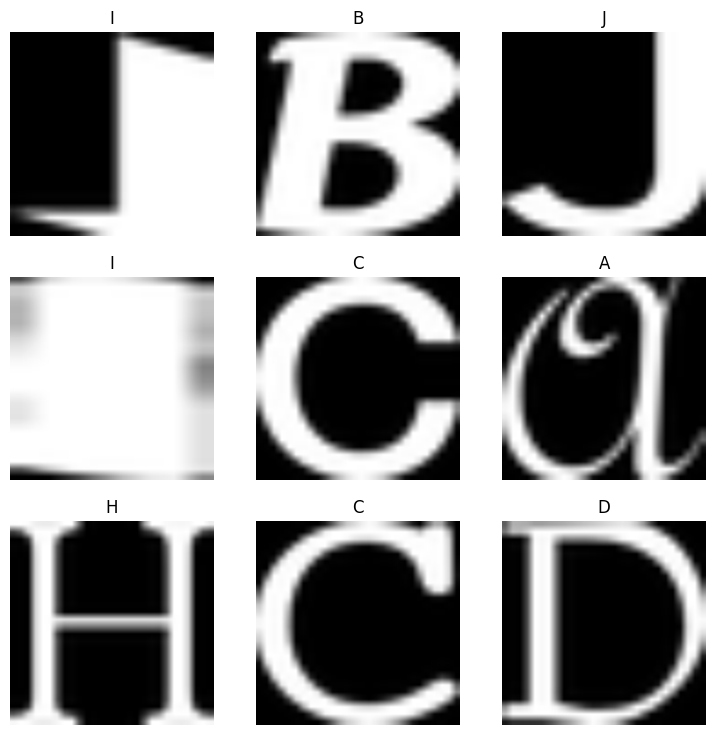

In [24]:
loader.show_batch(max_n=9)

In [45]:
# Библиотека fast ai предоставляет возможность сконфигурировать свою нейронную сеть, но мы в данном примере воспользуемся 
# предобученной свёрточной нейросетью resnet34, которая подходит для классификации изображений

In [25]:
learn = cnn_learner(loader, resnet34, metrics=error_rate)

In [46]:
# Параметры cnn_learner:
    
#    dls (объект data loaders) - выше loader
#    arch (архитектура нейронной сети) - выше resnet34
#    metrics (метрики) - выше error_rate (1 - accuracy: computes accuracy with targ when pred is bs * n_classes)
#    opt_func - оптимизатор
# По умолчанию, предлагается использовать оптимизатор Adam. В fast ai помимо Adam реализованы SGD, RMSProp, RAdam, QHAdam, 
# LARS/LARC, LAMB.

# Продолжим с оптимизатором Adam, вызываем метод fine_tune для обучения нейронки под нашу задачу:

In [26]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.724623,0.435820,0.126437,02:00


epoch,train_loss,valid_loss,error_rate,time
0,0.326189,0.205176,0.061214,03:16
1,0.213298,0.193949,0.054531,03:16
2,0.162176,0.182548,0.052927,03:15
3,0.130826,0.159821,0.044908,03:14
4,0.073011,0.142672,0.036889,03:14
5,0.047013,0.157137,0.037156,03:14
6,0.023084,0.145242,0.034215,05:33
7,0.009510,0.139177,0.032077,03:13
8,0.002779,0.139531,0.030740,03:13
9,0.003089,0.140299,0.031275,03:13


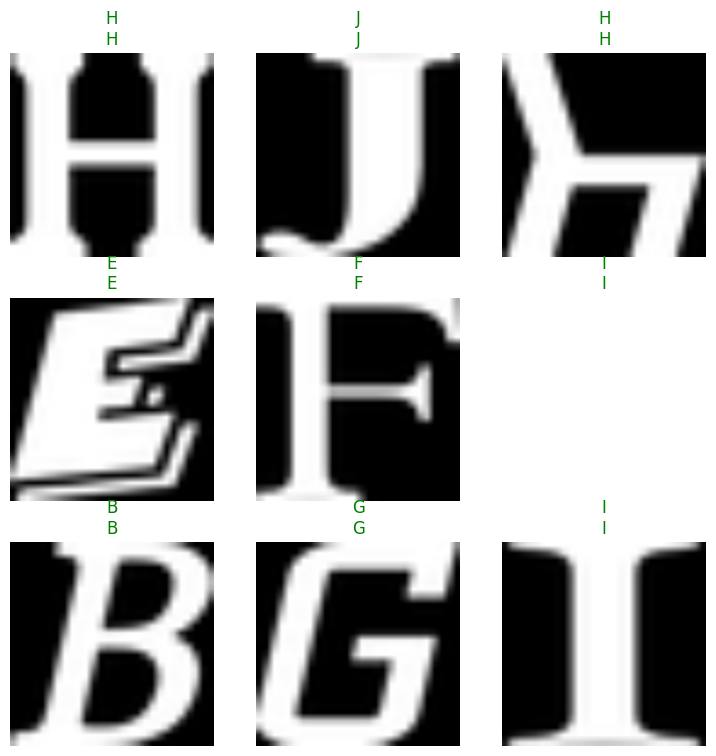

In [27]:
learn.show_results()

In [30]:
# Теперь мы можем попробовать классифицировать изображение с буквой, которого не было в исходной выборке, 
# вызвав метод predict и передав путь к изображению

In [28]:
learn.predict(item='../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 2.png')

('C',
 TensorBase(2),
 TensorBase([1.0013e-09, 8.9893e-10, 9.9999e-01, 9.5642e-07, 4.0399e-06,
             3.6778e-08, 2.9195e-06, 8.1634e-10, 1.3242e-08, 5.2368e-08]))

In [ ]:
# Модель классифицирована верно, вероятность составила 99%.

In [7]:
from PIL import Image
import numpy as np
import cv2

In [38]:
imageFile = "../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 2.png"
image = Image.open(imageFile)
image

In [29]:
learn.predict(item='../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 21.08.12.png')

('E',
 TensorBase(4),
 TensorBase([4.7856e-11, 1.5118e-07, 1.1932e-07, 1.7080e-10, 1.0000e+00,
             8.7100e-09, 3.0355e-09, 4.8994e-10, 3.5693e-09, 2.6024e-11]))

In [ ]:
# Модель классифицирована верно, вероятность составила 100%.

In [39]:
imageFile = "../ДЗ28_Мышковец С.А./Test/MDEtMDEtMDAudHRm 21.08.12.png"
image = Image.open(imageFile)
image

In [51]:
# call an instance of metric first. In general, everything that begins with a capital needs to be instantiated 
# (we are naming functions that needs to be called with a capital too, to help with that).

rocauc = RocAuc()

In [52]:
learn_auc = cnn_learner(loader, resnet34, metrics=rocauc)

In [53]:
learn_auc.fine_tune(5)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.762920,0.440184,0.988868,02:02


epoch,train_loss,valid_loss,roc_auc_score,time
0,0.310954,0.206683,0.997419,03:16
1,0.213552,0.164129,0.998428,03:16
2,0.118523,0.157708,0.998634,03:15
3,0.053063,0.131128,0.999108,03:15
4,0.017763,0.131890,0.999128,03:16


In [54]:
learn_auc.predict(item='../ДЗ28_Мышковец С.А./Test/MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png')

('G',
 TensorBase(6),
 TensorBase([3.4064e-05, 6.4343e-04, 4.8626e-06, 8.8265e-06, 1.4191e-05,
             3.7301e-06, 9.9889e-01, 2.9689e-05, 2.6703e-05, 3.4300e-04]))

In [59]:
# Модель классифицирована верно, вероятность составила 99%.

In [55]:
imageFile = "../ДЗ28_Мышковец С.А./Test/MTAuMTUgU2F0dXJkYXkgTmlnaHQgQlJLLnR0Zg==.png"
image = Image.open(imageFile)
image

In [56]:
learn_auc.predict(item='../ДЗ28_Мышковец С.А./Test/R290aGljSWxsdW1pbmF0ZS50dGY=.png')

('H',
 TensorBase(7),
 TensorBase([0.0207, 0.1595, 0.0291, 0.0050, 0.0981, 0.0615, 0.0495, 0.3351,
             0.1202, 0.1212]))

In [58]:
# Модель классифицирована верно, вероятность составила 33%.

In [57]:
imageFile = "../ДЗ28_Мышковец С.А./Test/R290aGljSWxsdW1pbmF0ZS50dGY=.png"
image = Image.open(imageFile)
image

# Xception

In [138]:
np_vect = []
np_classes = []

for i in fnames:
    i_pil = Image.open(i)
    i_np = np.asarray(i_pil)
    np_vect.append(i_np)
    
    i_class = str(i).split("/")[-2]
    np_classes.append(i_class)

In [139]:
data = {'Vector':np_vect,'Class':np_classes}

In [140]:
df = pd.DataFrame(data)

In [179]:
X = [i for i in df.Vector]
X = np.array(X)

y = df.Class

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

In [181]:
X_valid, X_train = X_train_full[:3095], X_train_full[3095:]
y_valid, y_train = y_train_full[:3095], y_train_full[3095:]

In [182]:
X_valid = [i for i in X_valid]
X_valid = np.array(X_valid)
X_valid.shape

(3095, 28, 28)

In [183]:
X_train = [i for i in X_train]
X_train = np.array(X_train)
X_train.shape

(10000, 28, 28)

In [184]:
class_names = ['H', 'J', 'C', 'B', 'D', 'E', 'A', 'I', 'G', 'F']

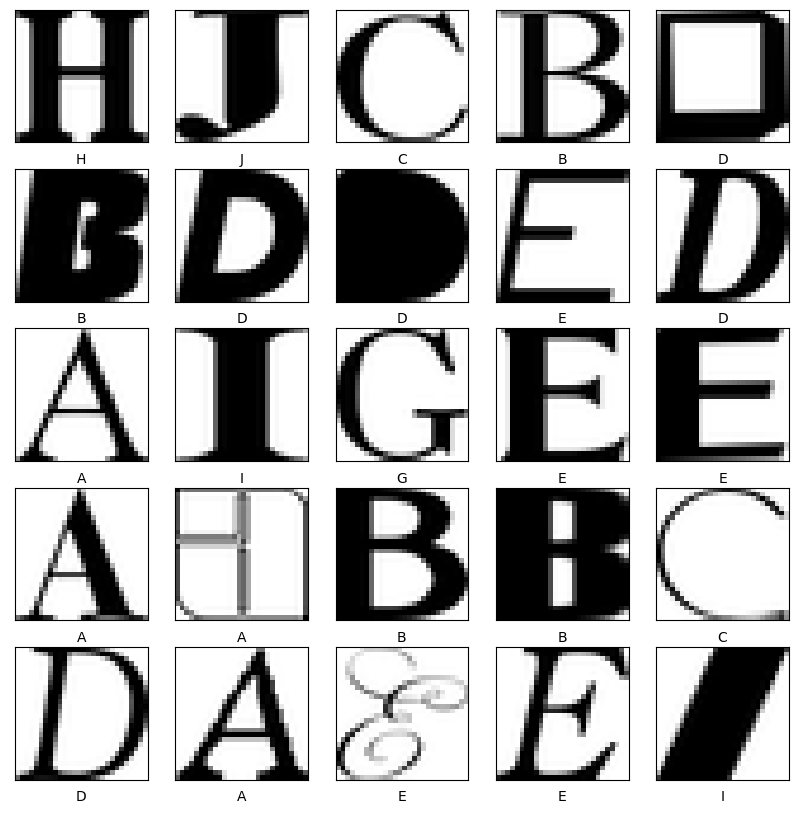

In [200]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(labelencoder.classes_[y_train_full[i]])
plt.show()

In [201]:
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255.

In [330]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils
from tensorflow.keras.metrics import AUC

model = keras.models.Sequential([tf.keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(300, activation = 'relu'),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(10, activation = 'softmax' )])

In [331]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 300)               235500    
                                                                 
 dense_36 (Dense)            (None, 100)               30100     
                                                                 
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 286,810
Trainable params: 286,810
Non-tr

In [332]:
tf.__version__

'2.11.0'

In [333]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer = tf.keras.optimizers.Adam(),
metrics = ["accuracy"])

In [334]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10


2023-02-20 20:53:43.997441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-20 20:53:44.120501: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x2964b3390
2023-02-20 20:53:44.120528: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x2964b3390
2023-02-20 20:53:44.126374: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x2964b3390
2023-02-20 20:53:44.126396: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x2964b3390
2023-02-20 20:53:44.132324: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_8' defined at (most recent call last):
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/s8/yypls09j61bb1cjkz85h1n7c0000gn/T/ipykernel_1001/1480320112.py", line 1, in <module>
      history = model.fit(X_train,
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/tf_mac/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_8'
could not find registered platform with id: 0x2964b3390
	 [[{{node StatefulPartitionedCall_8}}]] [Op:__inference_train_function_146654]

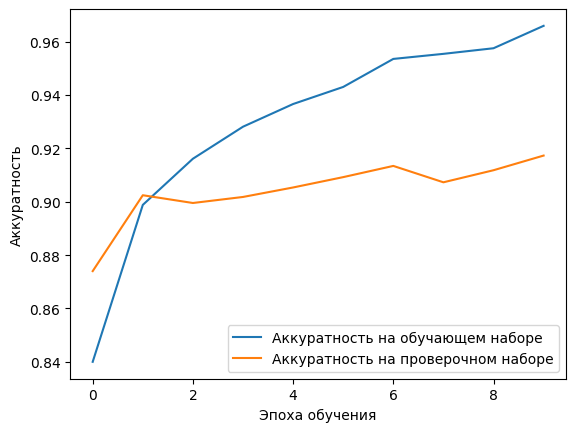

In [288]:
plt.plot(history.history['accuracy'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

In [289]:
model.evaluate(X_test, y_test)

176/176 [==============================] - 1s 5ms/step - loss: 0.4061 - accuracy: 0.9123


[0.4060843586921692, 0.9123463034629822]

In [290]:
model.metrics_names

['loss', 'accuracy']

In [306]:
tf.__version__

'2.11.0'

In [299]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [300]:
images_resized = tf.image.resize(X, [224, 224])

In [304]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

InvalidArgumentError: {{function_node __wrapped__BiasAdd_device_/job:localhost/replica:0/task:0/device:GPU:0}} Must provide as many biases as the channel dimension of the input tensor: [3] vs. 28 in [224,224,28] [Op:BiasAdd]

In [305]:
Y_proba = model.predict(inputs)

NameError: name 'inputs' is not defined